In [41]:
import requests
import config
import json
import random
import matplotlib.pyplot as plt
from Data_Crawler import Data_Crawler

In [4]:
# This is the code for the first interval validation.
# Here, we set up everything similarly to how the Sampler was set. One difference here is that we keep track of the individual density acquired after each API response.

data_crawler = Data_Crawler(0)
validation_sum_of_densities = 0
validation_num_sampled_intervals = 0
validation_next_interval = 0
validation_last_accessed_value = 0
densities = []

In [81]:
for x in range(60):
    validation_data_response = data_crawler.sample(round(validation_next_interval))
    if validation_data_response == []:
        break
    else:
        validation_interval_length = data_crawler.extract_length(validation_data_response)
        validation_num_of_responses = data_crawler.extract_number_of_response(validation_data_response)
        validation_density = validation_num_of_responses / validation_interval_length
        validation_last_accessed_value = validation_data_response[validation_num_of_responses-1]['id']
        validation_next_interval = data_crawler.calculate_next_interval(validation_last_accessed_value, 1)
        validation_sum_of_densities += validation_density
        validation_num_sampled_intervals += 1
        densities.append(validation_density)

In [82]:
# We calculate the total range of the data here.

total_range_check = 0
for h in range(len(densities)):
    total_range_check += 30 / densities[h]
total_range_check

38203.0

In [83]:
space_length = total_range_check - 0

In [84]:
# Calculates the total number of active users in the given space.
# Assumption: since we are not at the end of the data space, we can assume that each request returned 30 responses.

total_number_of_active_users = 30*len(densities)
total_number_of_active_users

36000

In [86]:
# We create an array of the number of samples for each estimation to be calculated.

sample_indexes = list(range(len(densities)+1))
sample_indexes.remove(0)

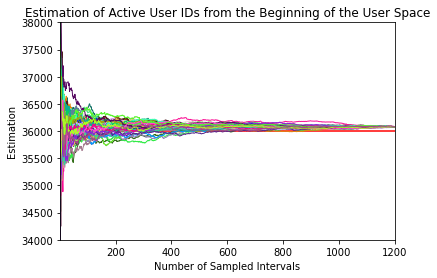

In [90]:
# This creates the ground truth line
x = [0,len(densities)+200]
y = [total_number_of_active_users,total_number_of_active_users]

plt.plot(x,y, color='red')

# Here, we run 40 iterations of our random sampling technique.
for y in range(40):
    # Picks a random order of the sampled intervals
    samples = random.sample(range(len(densities)),len(densities))
    sampled_estimations = []
    sum_of_densities = 0

    # Iterate through each sample
    for x in range(len(samples)):
        # Keeps track of the total sum of densities
        sum_of_densities += densities[samples[x]]

        # Calculates the estimation at this instance with this number of sampled intervals
        sampled_estimations.append((space_length/sample_indexes[x])*sum_of_densities)

    # Randomly generates a color for each line in the plot to avoid a blob
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    # Plots the number of sampled indexes against the estimation
    plt.plot(sample_indexes, sampled_estimations, color=color, linewidth = 1)
  

plt.xlabel('Number of Sampled Intervals')
plt.ylabel('Estimation') 
plt.title('Estimation of Active User IDs from the Beginning of the User Space')
  
# setting x and y axis range 
plt.ylim(34000,38000) 
plt.xlim(1,1200)
 
plt.show() 